##  Dataset Overview and Objective:

In this task, we use the Spotify Tracks dataset to perform binary classification using the K-Nearest Neighbors (KNN) algorithm.  
The objective is to predict whether a song is "popular" or "not popular" based on its musical features.

We define a track as **popular** if its `popularity` score is **≥ 70**, and **not popular** otherwise.

This will help demonstrate how instance-based learning algorithms like KNN perform on real-world, non-trivial datasets.


In [1]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.decomposition import PCA

## Step 2: Data Cleaning and Preprocessing

We begin by:
- Dropping irrelevant columns (like track name, artist, etc.)
- Creating a binary target label (`popularity_label`)
- Handling missing values by dropping rows with any NaNs

This ensures that the data is clean and only numerical features remain for KNN to compute distances correctly.


In [4]:
# 2. Load Dataset
df = pd.read_csv("/content/spotify dataset.csv")

<ipython-input-4-f9635c169fad>:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/spotify dataset.csv")


In [5]:
# Understanding the data
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73.0,230666.0,False,0.676,0.4610,...,-6.746,0.0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4.0,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55.0,149610.0,False,0.420,0.1660,...,-17.235,1.0,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4.0,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57.0,210826.0,False,0.438,0.3590,...,-9.734,1.0,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4.0,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71.0,201933.0,False,0.266,0.0596,...,-18.515,1.0,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3.0,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82.0,198853.0,False,0.618,0.4430,...,-9.681,1.0,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4.0,acoustic


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47843 entries, 0 to 47842
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        47843 non-null  int64  
 1   track_id          47843 non-null  object 
 2   artists           47843 non-null  object 
 3   album_name        47843 non-null  object 
 4   track_name        47843 non-null  object 
 5   popularity        47842 non-null  float64
 6   duration_ms       47842 non-null  float64
 7   explicit          47842 non-null  object 
 8   danceability      47842 non-null  float64
 9   energy            47842 non-null  float64
 10  key               47842 non-null  float64
 11  loudness          47842 non-null  float64
 12  mode              47842 non-null  float64
 13  speechiness       47842 non-null  float64
 14  acousticness      47842 non-null  float64
 15  instrumentalness  47842 non-null  float64
 16  liveness          47842 non-null  float6

In [7]:
df.describe() #Descriptive Statistics

,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,47843.000000,47842.000000,4.784200e+04,47842.000000,47842.000000,47842.000000,47842.000000,47842.000000,47842.000000,47842.000000,47842.000000,47842.000000,47842.000000,47842.000000,47842.000000
mean,23921.000000,33.200744,2.308165e+05,0.564279,0.654677,5.332177,-8.187229,0.630722,0.093985,0.287917,0.192312,0.210075,0.452813,123.105320,3.912671
std,13811.228801,21.796372,1.209484e+05,0.176639,0.251562,3.559076,5.018307,0.482614,0.133902,0.328281,0.332262,0.186929,0.257363,29.087692,0.407880
min,0.000000,0.000000,1.745300e+04,0.000000,0.000020,0.000000,-42.044000,0.000000,0.000000,0.000000,0.000000,0.011200,0.000000,0.000000,0.000000
25%,11960.500000,17.000000,1.732325e+05,0.448000,0.491000,2.000000,-9.850750,0.000000,0.036200,0.009112,0.000000,0.097000,0.237000,101.035000,4.000000
50%,23921.000000,34.000000,2.133665e+05,0.577000,0.701000,5.500000,-6.886000,1.000000,0.049600,0.126000,0.000189,0.130000,0.432000,123.013500,4.000000
75%,35881.500000,50.000000,2.659120e+05,0.696000,0.867000,8.000000,-4.982000,1.000000,0.087800,0.541750,0.219000,0.268000,0.656000,140.049000,4.000000
max,47842.000000,100.000000,4.789026e+06,0.983000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,0.997000,0.995000,0.995000,243.372000,5.000000


In [8]:
# 3. Drop unnecessary columns
df.drop(columns=[
    'Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name', 'track_genre'
], inplace=True)

## Step 3: Feature Normalization

We use `StandardScaler` to normalize all numerical features.

This step is crucial for KNN because it is a distance-based algorithm.  
Without normalization, features with larger numerical ranges (e.g., loudness or tempo) would dominate the distance calculation and mislead the classifier.


In [9]:
# 4. Create binary classification target
# Popular if popularity ≥ 70
df['popularity_label'] = df['popularity'].apply(lambda x: 1 if x >= 70 else 0)
df.drop(columns=['popularity'], inplace=True)


In [10]:
# 5. Separate features and target
X = df.drop(columns=['popularity_label'])
y = df['popularity_label']


In [14]:
# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

# # Drop rows with missing values
# df.dropna(inplace=True)

# Confirm no missing values remain
# print("\nAfter dropping missing values:")
# print(df.isnull().sum())

Missing values per column:
duration_ms         1
explicit            1
danceability        1
energy              1
key                 1
loudness            1
mode                1
speechiness         1
acousticness        1
instrumentalness    1
liveness            1
valence             1
tempo               1
time_signature      1
popularity_label    0
dtype: int64


In [15]:
# Drop rows with missing values
df.dropna(inplace=True)

In [16]:
# Confirm no missing values remain
print("\nAfter dropping missing values:")
print(df.isnull().sum())


After dropping missing values:
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
popularity_label    0
dtype: int64


In [20]:
# Now separate features and target after dropping NaNs
X = df.drop(columns=['popularity_label'])
y = df['popularity_label']

In [21]:
# 6. Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Step 4: Train-Test Split

We split the dataset into 80% training and 20% testing sets using stratified sampling.  
This ensures that the proportion of popular and non-popular tracks remains consistent across both splits.

Stratification is especially important when dealing with imbalanced classes like this one.


In [22]:
# 7. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

## Step 5: KNN Model Training and Evaluation

We train multiple KNN classifiers with different values of K (3, 5, 7, 9) and evaluate each on the test set.

For each model:
- Accuracy is measured
- Confusion matrix is printed to visualize class-specific performance
- Precision, recall, and F1-score are reported via the classification report

Observations:
- Overall accuracy was high (e.g., ~96%)
- However, due to class imbalance, the classifier performs better on the "not popular" class.


In [23]:
# 8. Try different K values
k_values = [3, 5, 7, 9]
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

In [27]:
acc = accuracy_score(y_test, y_pred)
print(f"\nK = {k}")
print(f"Accuracy: {acc:.4f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


K = 9
Accuracy: 0.9553
Confusion Matrix:
[[9126   26]
 [ 402   15]]


## Step 6: Confusion Matrix Analysis

The confusion matrix shows:

- True Positives (TP): Popular tracks correctly classified
- True Negatives (TN): Not popular tracks correctly classified
- False Positives (FP): Not popular tracks incorrectly classified as popular
- False Negatives (FN): Popular tracks missed by the model

We observe that the model tends to favor the majority class (not popular), highlighting the effect of class imbalance.


In [26]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      9152
           1       0.37      0.04      0.07       417

    accuracy                           0.96      9569
   macro avg       0.66      0.52      0.52      9569
weighted avg       0.93      0.96      0.94      9569



## Step 7: PCA + Decision Boundary Visualization

To visualize decision boundaries, we use PCA to reduce the feature space to 2 dimensions.

KNN decision regions are plotted on this 2D space:
- Areas with different colors represent how the classifier labels different regions
- Scatter points represent the actual data distribution

This gives us an intuitive sense of how the KNN classifier separates classes in a simplified projection of the high-dimensional feature space.


In [28]:
# 9. Visualize Decision Boundary using PCA (2D)
# Reduce dimensionality
pca = PCA(n_components=2)
X_vis = pca.fit_transform(X_scaled)


In [29]:
# Redo train/test split on visual data
X_vis_train, X_vis_test = train_test_split(X_vis, test_size=0.2, random_state=42, stratify=y)


In [30]:
# Refit KNN for best k (say k=5)
knn_vis = KNeighborsClassifier(n_neighbors=5)
knn_vis.fit(X_vis_train, y_train)

KNeighborsClassifier()

In [31]:
# Generate grid
x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))


In [32]:
Z = knn_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


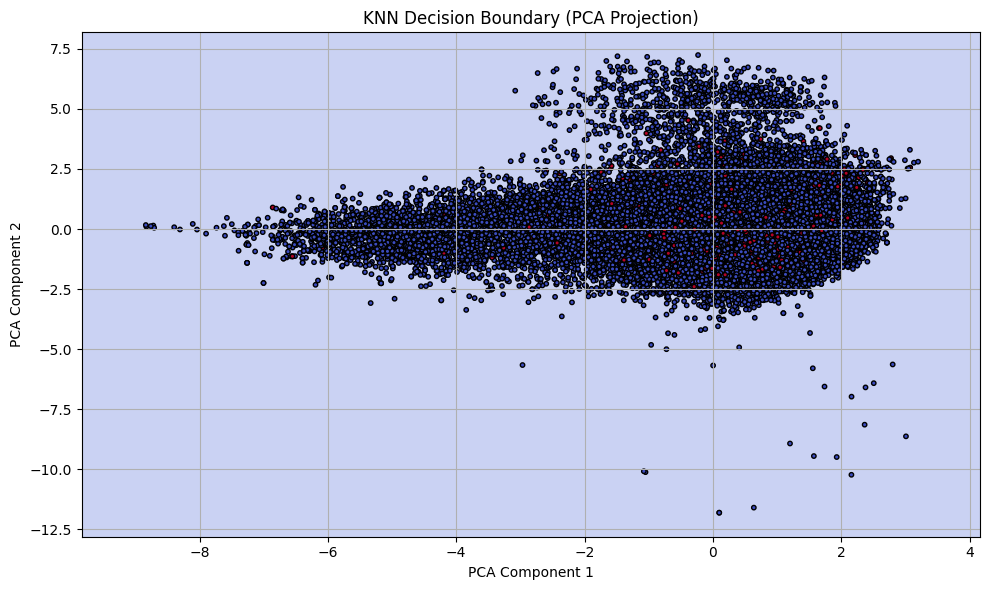

In [33]:
# Plot
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X_vis[:, 0], X_vis[:, 1], c=y, edgecolor='k', cmap=plt.cm.coolwarm, s=10)
plt.title('KNN Decision Boundary (PCA Projection)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)
plt.tight_layout()
plt.show()

### Decision Boundary Visualization (PCA - 2D)

This plot shows how the KNN model separates popular and unpopular songs after reducing the features to 2D using PCA.  
Each point is a song: red = popular, blue = unpopular. The background color represents the KNN decision regions.

PCA helps us visualize high-dimensional data in 2D. If the two classes are clearly separated, KNN is doing a good job. Overlapping areas suggest the model may struggle to distinguish the classes in some regions.


## Final Conclusion

- KNN achieved strong accuracy (~96%) on a real-world dataset.
- However, accuracy alone is misleading due to class imbalance.
- Important takeaways:
  - Normalize features for KNN
  - Carefully choose K (odd values reduce tie risks)
  - Visualizations like PCA help interpret model behavior
  - Consider imbalance solutions like SMOTE or class weighting in real applications

This task reinforces key machine learning principles around preprocessing, evaluation, and interpretability using a well-known yet creative dataset.
